In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

ValueError: mount failed

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score

In [67]:
# Leer csv
df_tiendas = pd.read_csv('/content/drive/MyDrive/2024/2do Cuatri - 2024/Proyecto Final/TP Proyecto/Entrega 3/Codigo E3/tiendas_caba_v6.csv')

In [ ]:
df_tiendas.shape

In [76]:
# Recorrer cada columna y verificar si tiene valores nulos
for col in df_tiendas.columns:
    nulos = df_tiendas[col].isnull().sum()
    if nulos > 0:
        print(f"Columna: {col}, Cantidad de nulos: {nulos}")

In [77]:
df_tiendas = df_tiendas.dropna()

In [78]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Lista de columnas a escalar
columnas_a_escalar = [
    'estaciones_servicio_200mts', 'estaciones_servicio_1000mts',
    'subtes_200mts', 'subtes_1000mts', 'hacinamiento',
    'uni_privada_200mts', 'uni_publica_200mts',
    'uni_privada_1000mts', 'uni_publica_1000mts',
    'estadios_200mts', 'estadios_1000mts',
    'river_1500mts', 'boca_1500mts',
    'clubes_200mts', 'clubes_1000mts',
    'tienda_mas_cercana', 'escuelas_cercanas_200m',
    'escuelas_cercanas_1000m', 'paradas_cercanas_200m',
    'paradas_cercanas_1000m', 'everdes_cercanos_200m',
    'everdes_cercanos_1000m', 'hospitales_cercanos_200m',
    'hospitales_cercanos_1000m', 'distancia_al_hospital_mas_cercano',
    'parroquias_cercanas_200m', 'parroquias_cercanas_1000m',
    'negocios_cercanos_200m', 'negocios_cercanos_1000m',
    'tiendas_cercanas_200m', 'supermercados_200m',
    'supermercados_1000m', 'hipermercado_200m',
    'hipermercado_1000m', 'autoservicio_200m',
    'autoservicio_1000m', 'negocios_24hs_cercanos_1000m',
    'negocios_findesemana_200m', 'pob',
    'producto_1_freq', 'producto_2_freq',
    'producto_3_freq', 'producto_4_freq',
    'producto_5_freq', 'categoria_1_freq',
    'categoria_2_freq', 'categoria_3_freq',
    'categoria_4_freq', 'categoria_5_freq',
    'comuna_freq'
]

# Crear un scaler
scaler = StandardScaler()

# Estandarizar las columnas seleccionadas
df_tiendas[columnas_a_escalar] = scaler.fit_transform(df_tiendas[columnas_a_escalar])

# Verifica los primeros datos escalados en el DataFrame
print(df_tiendas.head())

   estaciones_servicio_200mts  estaciones_servicio_1000mts  subtes_200mts  \
0                   -0.380506                    -0.007824      -0.294454   
1                   -0.380506                    -0.561661      -0.294454   
2                   -0.380506                    -1.115497      -0.294454   
3                   -0.380506                     1.099849      -0.294454   
4                   -0.380506                     1.099849      -0.294454   

   subtes_1000mts  porc_nbi  hacinamiento  porc_mujeres  porc_varones  \
0       -0.785641  0.138810      1.001735      0.494970      0.505030   
1        0.094348  0.007092     -0.020082      0.553468      0.446532   
2       -0.345646  0.085714     -1.150206      0.553043      0.446957   
3       -0.785641  0.038147      0.452352      0.556133      0.443867   
4        0.974337  0.048780     -1.060450      0.508772      0.491228   

   uni_privada_200mts  uni_publica_200mts  ...  producto_3_freq  \
0           -0.197211          

In [79]:
from sklearn.decomposition import PCA

# Applying PCA with the optimal number of components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_tiendas)

In [19]:
# Multiplicar cada componente por su varianza explicada
#pca_result = pca_result * pca.explained_variance_ratio_

In [8]:
import numpy as np
from sklearn.cluster import OPTICS
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

# Establecer la semilla
seed = 42
np.random.seed(seed)

# Rango de hiperparámetros a probar
param_grid = {
    'min_samples': [5, 10, 15],
    'xi': [0.05, 0.1, 0.2],
    'min_cluster_size': [0.05, 0.1, 0.2]
}

# Crear el modelo OPTICS
optics = OPTICS()

# Definir la función para calcular el puntaje (usando silhouette score)
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) > 1:  # Asegurarse de que haya al menos 2 clusters
        return silhouette_score(X, labels)
    else:
        return -1  # Valor negativo si no hay suficiente información

# Realizar el Grid Search
grid_search = GridSearchCV(estimator=optics, param_grid=param_grid, scoring=silhouette_scorer, cv=3)
grid_search.fit(pca_result)

# Resultados
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor Silhouette Score:", grid_search.best_score_)

KeyboardInterrupt: 

In [80]:
# OPTICS

optics_model = OPTICS(metric='euclidean', min_samples=10, xi=0.05, min_cluster_size=0.1)  # Ajusta parámetros según sea necesario
labels = optics_model.fit_predict(pca_result)

# Agregar las etiquetas de clusters al DataFrame original
df_tiendas['Cluster'] = labels

df_tiendas['Cluster'].value_counts()

,count
Cluster,
0,1958
-1,24


In [81]:
if len(set(labels)) > 1:  # Asegúrate de tener más de un clúster
    score = silhouette_score(pca_result, labels)
    print(f'Silhouette Score: {score}')
else:
    print('No hay suficientes clústeres para calcular el puntaje de silueta.')

Silhouette Score: 0.45274906065309206


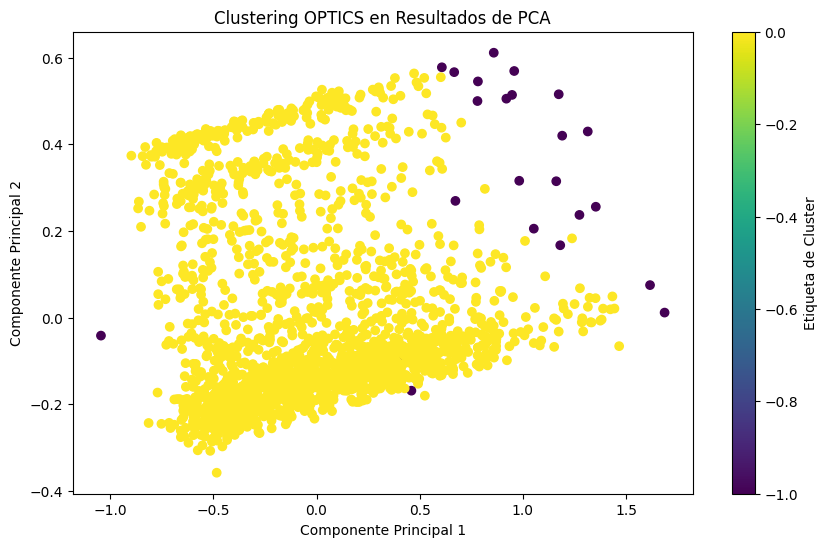

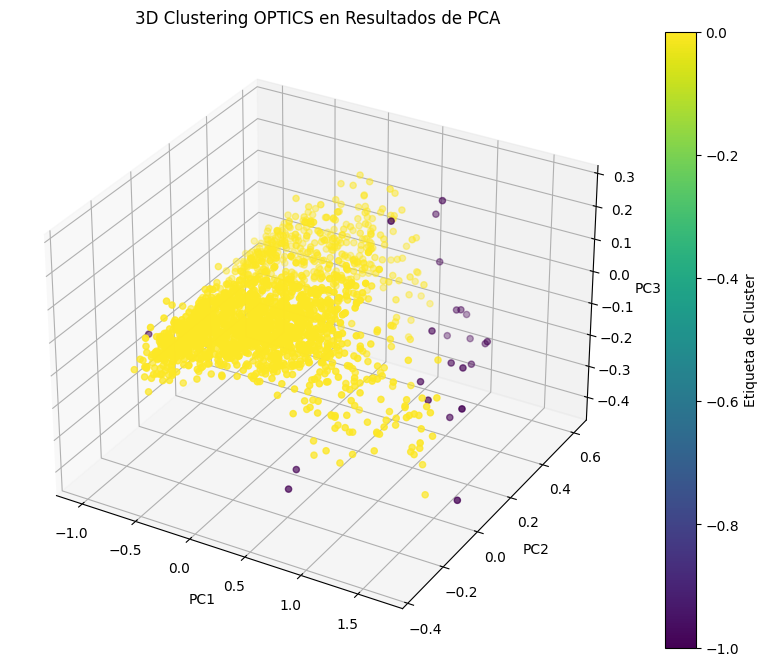

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Suponiendo que ya has realizado PCA y que 'pca_result' contiene los resultados de PCA.
# Además, 'labels' debe contener las etiquetas de los clusters generadas por OPTICS.

# Visualización 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering OPTICS en Resultados de PCA')
plt.colorbar(scatter, label='Etiqueta de Cluster')  # Agregar una barra de color asociada al scatter
plt.show()

# Visualización 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter_3d = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=labels, cmap='viridis', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D Clustering OPTICS en Resultados de PCA')
plt.colorbar(scatter_3d, label='Etiqueta de Cluster')  # Agregar una barra de color asociada al scatter 3D
plt.show()